In [1]:
data = [
    'I am Mohammed Abacha, the son of the late Nigerian Head of '
    'State who died on the 8th of June 1998. Since i have been '
    'unsuccessful in locating the relatives for over 2 years now '
    'I seek your consent to present you as the next of kin so '
    'that the proceeds of this account valued at US$15.5 Million '
    'Dollars can be paid to you. If you are capable and willing '
    'to assist, contact me at once via email with following '
    'details: 1. Your full name, address, and telephone number. '
    '2. Your Bank Name, Address. 3.Your Bank Account Number and '
    'Beneficiary Name - You must be the signatory.'
]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(data)

In [3]:
vec.get_feature_names()

['15',
 '1998',
 '8th',
 'abacha',
 'account',
 'address',
 'am',
 'and',
 'are',
 'as',
 'assist',
 'at',
 'bank',
 'be',
 'been',
 'beneficiary',
 'can',
 'capable',
 'consent',
 'contact',
 'details',
 'died',
 'dollars',
 'email',
 'following',
 'for',
 'full',
 'have',
 'head',
 'if',
 'in',
 'june',
 'kin',
 'late',
 'locating',
 'me',
 'million',
 'mohammed',
 'must',
 'name',
 'next',
 'nigerian',
 'now',
 'number',
 'of',
 'on',
 'once',
 'over',
 'paid',
 'present',
 'proceeds',
 'relatives',
 'seek',
 'signatory',
 'since',
 'so',
 'son',
 'state',
 'telephone',
 'that',
 'the',
 'this',
 'to',
 'unsuccessful',
 'us',
 'valued',
 'via',
 'who',
 'willing',
 'with',
 'years',
 'you',
 'your']

In [4]:
X.toarray()

array([[1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2,
        5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 3, 1, 1, 1,
        1, 1, 1, 1, 1, 4, 4]], dtype=int64)

In [5]:
'nigerian' in vec.get_feature_names()

True

In [6]:
'prince' in vec.get_feature_names()

False

---

#### 첫 번째 의사 결정 트리 만들기 
Building Our first Decision Tree

In [22]:
data = [
    {'age': 33, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.66, 'K': 0.06, 'drug': 'A'},
    {'age': 77, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.19, 'K': 0.03, 'drug': 'D'},
    {'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.80, 'K': 0.05, 'drug': 'B'},
    {'age': 39, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.19, 'K': 0.02, 'drug': 'C'},
    {'age': 43, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'high', 'Na': 0.36, 'K': 0.03, 'drug': 'D'},
    {'age': 82, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.09, 'K': 0.09, 'drug': 'C'},
    {'age': 40, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.89, 'K': 0.02, 'drug': 'A'},
    {'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.80, 'K': 0.05, 'drug': 'B'},
    {'age': 29, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.35, 'K': 0.04, 'drug': 'D'},
    {'age': 53, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.54, 'K': 0.06, 'drug': 'C'},
    {'age': 36, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.53, 'K': 0.05, 'drug': 'A'},
    {'age': 63, 'sex': 'M', 'BP': 'low', 'cholesterol': 'high', 'Na': 0.86, 'K': 0.09, 'drug': 'B'},
    {'age': 60, 'sex': 'M', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.66, 'K': 0.04, 'drug': 'C'},
    {'age': 55, 'sex': 'M', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.82, 'K': 0.04, 'drug': 'B'},
    {'age': 35, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'high', 'Na': 0.27, 'K': 0.03, 'drug': 'D'},
    {'age': 23, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.55, 'K': 0.08, 'drug': 'A'},
    {'age': 49, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.27, 'K': 0.05, 'drug': 'C'},
    {'age': 27, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.77, 'K': 0.02, 'drug': 'B'},
    {'age': 51, 'sex': 'F', 'BP': 'low', 'cholesterol': 'high', 'Na': 0.20, 'K': 0.02, 'drug': 'D'},
    {'age': 38, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.78, 'K': 0.05, 'drug': 'A'}
]

In [25]:
target = [d['drug'] for d in data]
np.unique(target)

array(['A', 'B', 'C', 'D'], dtype='<U1')

In [26]:
# data에서 drug 삭제
[d.pop('drug') for d in data];

In [28]:
data[:5]

[{'age': 33,
  'sex': 'F',
  'BP': 'high',
  'cholesterol': 'high',
  'Na': 0.66,
  'K': 0.06},
 {'age': 77,
  'sex': 'F',
  'BP': 'high',
  'cholesterol': 'normal',
  'Na': 0.19,
  'K': 0.03},
 {'age': 88,
  'sex': 'M',
  'BP': 'normal',
  'cholesterol': 'normal',
  'Na': 0.8,
  'K': 0.05},
 {'age': 39,
  'sex': 'F',
  'BP': 'low',
  'cholesterol': 'normal',
  'Na': 0.19,
  'K': 0.02},
 {'age': 43,
  'sex': 'M',
  'BP': 'normal',
  'cholesterol': 'high',
  'Na': 0.36,
  'K': 0.03}]

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [35]:
age = [d['age'] for d in data]
age[:5]

[33, 77, 88, 39, 43]

In [36]:
sodium = [d['Na'] for d in data]
potassium = [d['K'] for d in data]

Text(0,0.5,'potassium')

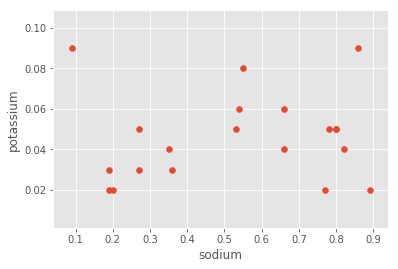

In [37]:
plt.scatter(sodium, potassium)
plt.xlabel('sodium')
plt.ylabel('potassium')

In [38]:
# target = [ord(t) - 65 for t in target]
target

[0, 3, 1, 2, 3, 2, 0, 1, 3, 2, 0, 1, 2, 1, 3, 0, 2, 1, 3, 0]

Text(0,0.5,'sodium')

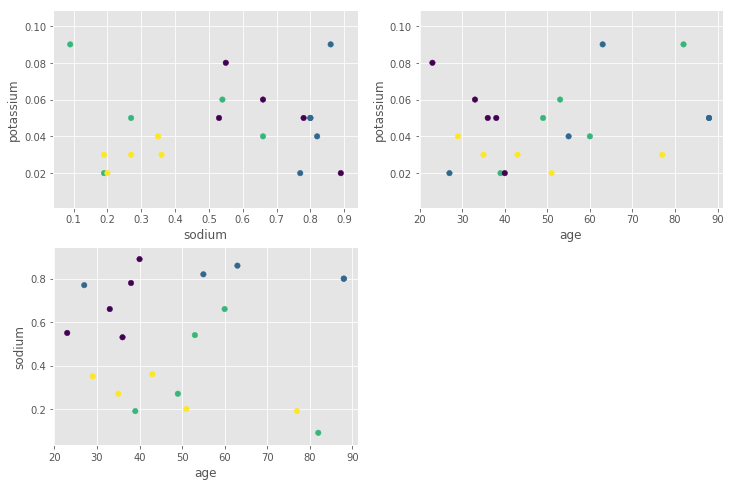

In [39]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.scatter(sodium, potassium, c=target, s=30)
plt.xlabel('sodium')
plt.ylabel('potassium')

plt.subplot(222)
plt.scatter(age, potassium, c=target, s=30)
plt.xlabel('age')
plt.ylabel('potassium')

plt.subplot(223)
plt.scatter(age, sodium, c=target, s=30)
plt.xlabel('age')
plt.ylabel('sodium')


#### 데이터 전처리

의사결정트리에서 데이터를 이해하려면, 모든 범주적 특징 ('sex','BP','cholesterol')을 숫자형 특징으로 변환해야 한다. 이를 위해 DictVectorizer를 이용한다.

In [41]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
data_pre = vec.fit_transform(data)

데이터 변수가 OpenCV와 호환되는지 확인하려면 모든 것을 부동 소수점 값으로 변환해야 함.

In [42]:
import numpy as np
data_pre = np.array(data_pre, dtype=np.float32)
target = np.array(target, dtype=np.float32)

In [43]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(data_pre, target, test_size=5, random_state=42)

훈련된 의사 결정 트리 시각화

In [44]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()

In [45]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
dtc.score(X_train, y_train)

1.0

In [47]:
dtc.score(X_test, y_test)

0.4

In [51]:
dtc.feature_importances_

array([0.        , 0.        , 0.        , 0.13554217, 0.29718876,
       0.24096386, 0.32630522, 0.        , 0.        , 0.        ])

In [61]:
vec.get_feature_names()

['BP=high',
 'BP=low',
 'BP=normal',
 'K',
 'Na',
 'age',
 'cholesterol=high',
 'cholesterol=normal',
 'sex=F',
 'sex=M']

matplotlib.pyplot.barh(y, width, *, align='center', tick_label=?)

<BarContainer object of 10 artists>

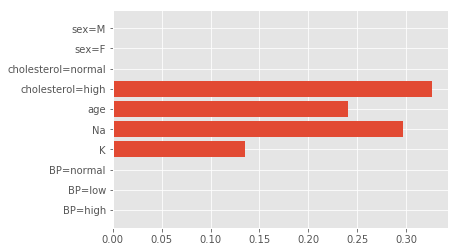

In [69]:
plt.barh(range(10), dtc.feature_importances_, align='center', tick_label=vec.get_feature_names())